In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import wandb
import logging
import pickle
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
run = wandb.init()
artifact = run.use_artifact('andre-silva1ifrn/divorce_kmeans/model_kmeans.pkl:v0', type='model')
artifact_dir = artifact.download()

with open(artifact_dir+'/model_kmeans.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

wandb: Currently logged in as: andre-silva1ifrn. Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
#Global variables

# name of the input artifact
artifact_input_name = "divorce_kmeans/test.csv:latest"

# type of the artifact
artifact_type = "segregated_data"

# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

# initiate wandb project
run = wandb.init(project="divorce_kmeans", job_type="test_data")

logger.info("Downloading and reading artifact")
artifact = run.use_artifact(artifact_input_name)
artifact_path = artifact.file()
df = pd.read_csv(artifact_path)

In [ ]:
df.isnull().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       45 non-null     int64
 1   Q2       45 non-null     int64
 2   Q3       45 non-null     int64
 3   Q4       45 non-null     int64
 4   Q5       45 non-null     int64
 5   Q6       45 non-null     int64
 6   Q7       45 non-null     int64
 7   Q8       45 non-null     int64
 8   Q9       45 non-null     int64
 9   Q10      45 non-null     int64
 10  Q11      45 non-null     int64
 11  Q12      45 non-null     int64
 12  Q13      45 non-null     int64
 13  Q14      45 non-null     int64
 14  Q15      45 non-null     int64
 15  Q16      45 non-null     int64
 16  Q17      45 non-null     int64
 17  Q18      45 non-null     int64
 18  Q19      45 non-null     int64
 19  Q20      45 non-null     int64
 20  Q21      45 non-null     int64
 21  Q22      45 non-null     int64
 22  Q23      45 non-null     int

In [ ]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,2,2,1,0
1,3,2,4,3,3,2,3,2,2,3,...,0,0,3,3,3,3,3,3,3,1
2,0,1,1,0,0,2,0,0,0,0,...,2,2,2,0,2,1,1,1,0,0
3,0,0,2,0,0,0,0,0,0,0,...,3,1,2,1,2,1,2,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,1,2,3,2,2,3,1,1,0
5,4,3,3,4,4,1,0,3,3,4,...,3,4,3,4,4,3,4,3,4,1
6,0,3,1,0,0,0,0,0,0,0,...,1,1,4,0,0,2,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0
8,0,0,1,0,0,0,0,1,1,0,...,3,3,3,0,1,3,3,3,1,0
9,4,3,4,4,0,0,0,0,0,0,...,0,0,4,4,4,4,0,0,0,0


In [ ]:
logger.info("Outlier Removal")
# Temporary Variable
x = df.select_dtypes("int64").copy()

# identify outlier in the dataset
lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

In [ ]:
df = df.loc[mask,:].copy()

In [ ]:
labels = df['Divorce']

data = df.iloc[:, :-1]



data = data.values
print(data.shape)

(45, 54)


In [ ]:
y = loaded_model.predict(data)

In [ ]:
accuracy = accuracy_score(labels.values, y)
accuracy

0.9555555555555556

In [ ]:
print(y)

[0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 0]


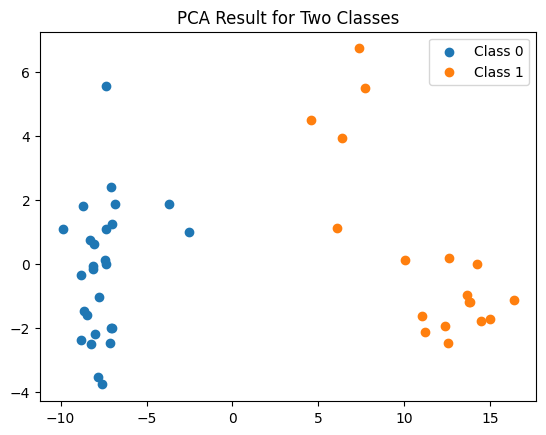

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(df)

pca_2d = pca.transform(df)


for label in set(labels):
    plt.scatter(pca_2d[y == label, 0], pca_2d[y == label, 1], label=f'Class {label}')

plt.title('PCA Result for Two Classes')
plt.legend()

plt.show()

In [ ]:
# close the run
# waiting a while after run the previous cell before execute this
run.finish()